In [2]:
from  scipy import fft,ifft
import numpy as np
import matplotlib.pyplot as plt
from classical_ham import classical_ham
from tqdm import tqdm_notebook as tqdm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Constant potential

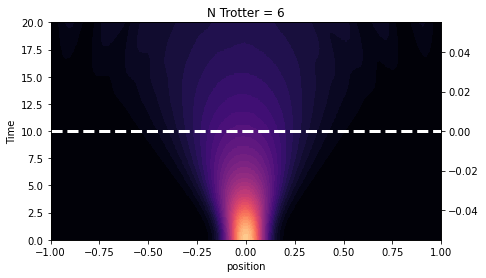

In [45]:
n=7
dt=20
h=classical_ham(n=n, start_mu=0, start_p0=-2, start_sigma=.1,dt=dt)
h.set_V(-1/np.cosh(15*(h.x-.25))*0)
r=[]
DT=np.linspace(0,20,200)
for T in tqdm(DT):
    r.append(h.simple_v(T))
r=np.array(r)
fig,ax=plt.subplots(figsize=(7,4))
ax.contourf(h.x,DT,r,40,cmap="magma",vmax=.1)
ax1=ax.twinx()
ax1.plot(h.x,-h.v,c="w",lw=3,ls="--")
ax.set_title(f"N Trotter = {int(2**n/dt)}")
ax.set_xlabel("position")
ax.set_ylabel("Time")
plt.show()


# Quadratic example

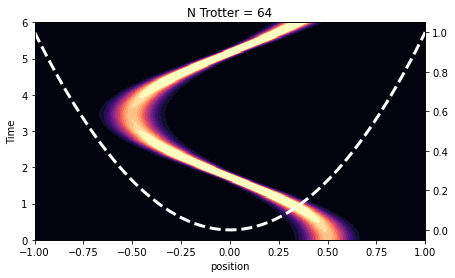

In [54]:
n=7
dt=2
h=classical_ham(n=n, start_mu=.5, start_p0=-1, start_sigma=.1,dt=dt)
h.set_V(h.x**2 *1)
r=[]
DT=np.linspace(0,6,400)
for T in tqdm(DT):
    r.append(h.simple_v(T))
r=np.array(r)
fig,ax=plt.subplots(figsize=(7,4))
ax.contourf(h.x,DT,r,40,cmap="magma",vmax=.1)
ax1=ax.twinx()
ax1.plot(h.x,h.v,c="w",lw=3,ls="--")
ax.set_title(f"N Trotter = {int(2**n/dt)}")
ax.set_xlabel("position")
ax.set_ylabel("Time")
plt.savefig("../figs/quadratic.png",dpi=300)
plt.show()

# Double well potential

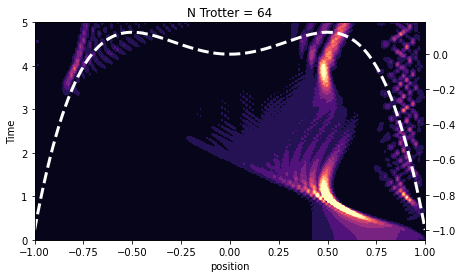

In [53]:
n=7
dt=2
h=classical_ham(n=n, start_mu=.75, start_p0=0, start_sigma=.3,dt=dt)
v=(h.x**2-2*h.x**4)*-1
h.set_V(v)
r=[]
DT=np.linspace(0,5,400)
for T in tqdm(DT):
    r.append(h.simple_v(T))
r=np.array(r)

fig,ax=plt.subplots(figsize=(7,4))
ax.contourf(h.x,DT,r,40,cmap="magma",vmax=.1)
ax1=ax.twinx()
ax1.plot(h.x,-1*h.v,c="w",lw=3,ls="--")
ax.set_title(f"N Trotter = {int(2**n/dt)}")
ax.set_xlabel("position")
ax.set_ylabel("Time")
plt.savefig("../figs/double_well.png",dpi=300)
plt.show()

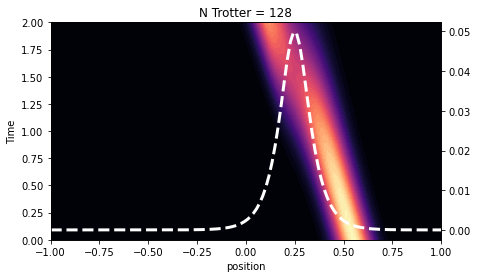

In [7]:
n=7
dt=1
h=classical_ham(n=n, start_mu=0.55, start_p0=-50, start_sigma=.09,dt=dt)
h.set_V(-1/np.cosh(15*(h.x-.25))*.05)
r=[]
DT=np.linspace(0,2,400)
for T in tqdm(DT):
    r.append(h.simple_v(T))
r=np.array(r)
fig,ax=plt.subplots(figsize=(7,4))
ax.contourf(h.x,DT,r,40,cmap="magma",vmax=.1)
ax1=ax.twinx()
ax1.plot(h.x,-h.v,c="w",lw=3,ls="--")
ax.set_title(f"N Trotter = {int(2**n/dt)}")
ax.set_xlabel("position")
ax.set_ylabel("Time")
plt.savefig("../figs/ecart.png",dpi=300)
plt.show()


# brownian SDE

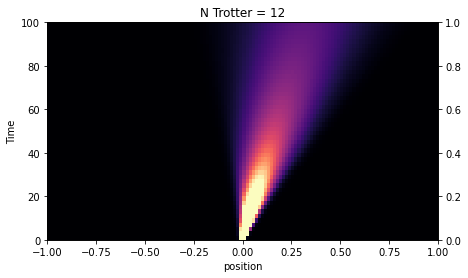

In [166]:
n=7
dt=10
r=.5
h=classical_ham(n=n, start_mu=0, start_p0=0, start_sigma=.01,dt=dt)
r=[]
DT=np.linspace(0,100,50)
for T in tqdm(DT):
    r.append(h.H_BS(T,sigma=.1,r=-.0))
r=np.array(r)
fig,ax=plt.subplots(figsize=(7,4))
ax.pcolorfast(h.x,DT,r,cmap="magma",vmax=.1)
ax1=ax.twinx()
ax.set_title(f"N Trotter = {int(2**n/dt)}")
ax.set_xlabel("position")
ax.set_ylabel("Time")
plt.savefig("../figs/EO.png",dpi=300)
plt.show()


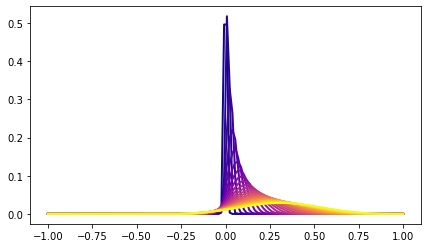

In [167]:
fig,ax=plt.subplots(figsize=(7,4))
c=np.linspace(0,1,len(r[::2]))
for j,i in enumerate(r[::2]):
    plt.plot(h.x,i,c=plt.get_cmap("plasma")(c[j]),lw=2)


In [1]:
get_rnd=lambda p,n,size=100:np.random.choice(np.linspace(-1,1,2**n),p=p,size=size)

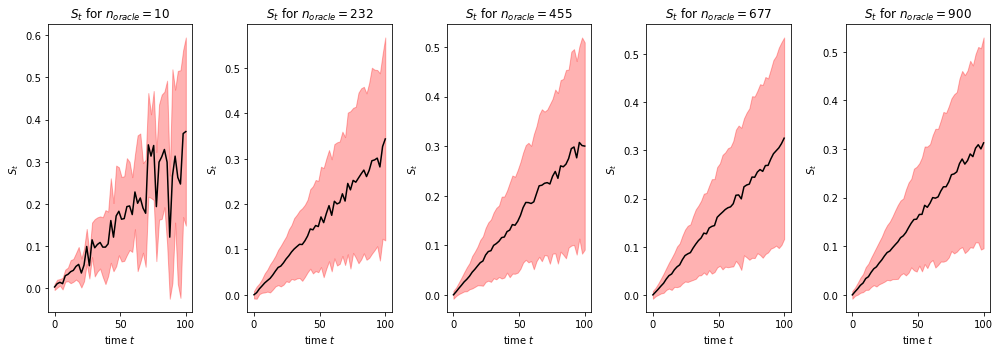

In [194]:

def plot_st(size,ax):
    data=np.array([get_rnd(i,n,size=size).tolist() for i in r])
    ax.plot(DT,data.mean(axis=1),c="k",label="$E[S_t]$")
    v=data.std(axis=1)
    ax.fill_between(DT,data.mean(axis=1)+v,data.mean(axis=1)-v,alpha=0.3,color="r",label="Var")
    ax.set_ylabel("$S_t$")
    ax.set_xlabel("time $t$")
    ax.set_title("$S_t$ for $n_{oracle}="+f"{size}"+"$")

fig,ax1=plt.subplots(1,5,figsize=(14,5))

for j,i in enumerate( np.linspace(10,900,5,dtype=int)):
    plot_st(i,ax1[j])
plt.tight_layout()
plt.show()

In [218]:
def get_E(num_samples=20,ntimes=20,mcsteps=[10,900]):
    vals=[]
    for _ in tqdm(range(ntimes)):
        E=[]
        samples=np.linspace(mcsteps[0],mcsteps[1],num_samples,dtype=int)
        for nsamples in samples:
            data=np.array([get_rnd(i,n,size=nsamples).tolist() for i in r])
            E.append(np.trapz(data.mean(axis=1),x=DT))
        vals.append(E)
    return np.array(vals)

In [247]:
# fig,ax=plt.subplots()
# plt.plot(samples,E)
data=get_E(num_samples=20,ntimes=100,mcsteps=[10,900])

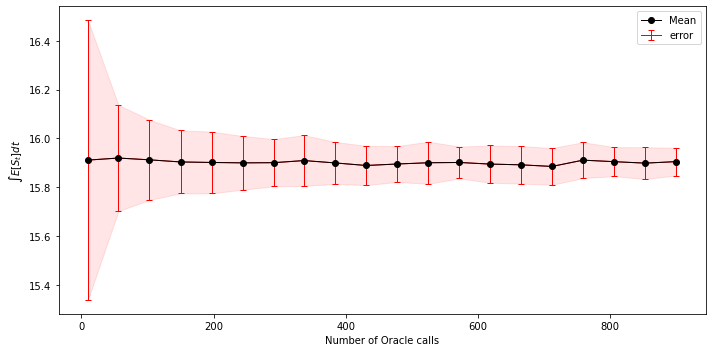

In [259]:
x=np.linspace(10,900,20,dtype=int)
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x,data.mean(axis=0),c="k",marker="o",lw=1,label="Mean")
err=data.std(axis=0)
ax.errorbar(x,data.mean(axis=0), yerr=err,color="r",zorder=-2,capsize=3,lw=1,label="error")
ax.fill_between(x,data.mean(axis=0)-err,data.mean(axis=0)+err,color="r",alpha=0.1)
ax.set_xlabel("Number of Oracle calls")
ax.set_ylabel("$\int E[S_t]dt$")
ax.legend()
plt.tight_layout()
plt.show()

In [283]:
n=7
sigma=2
r=2
dt=4
x=np.linspace(-1,1,2**n)
po_1 = -(x**2)*(sigma**2 / 2)
po_2 = (x)*((sigma**2 / 2)-r)
p2m = np.diag(np.exp(-1j*(po_1+po_2) * dt))

v = np.diag(np.exp(-1j*np.ones_like(x)*r * dt/2))

def applyh(x): return v@np.fft.ifft(np.fft.fftshift(p2m @ np.fft.fftshift(np.fft.fft(v@x))))
from scipy import signal
def get_next(x0):
    x1=do_it_for_t(10,x0)
    p=x1
    r0=np.random.choice(x,p=p,size=1)
    pos=np.argmin(np.abs(np.array(x)-r0))
    return signal.unit_impulse( 2**n,r),r0[0]
def do_it_for_t(t,x):
    t = t * 2**n
    # in total does 2^n/(dt) steps between each time steps
    for _ in range(int(t/dt)):
        x = applyh(x)
    return np.real(x*x.conj())

In [284]:
data=[]

for _ in range(20):
    val=0
    r=np.argmin(np.abs(np.array(x)-val))
    x0=signal.unit_impulse( 2**n,r)
    vals=[val]
    for _ in range(20):
        _,tmp=get_next(x0)
        vals.append(tmp)
    data.append(vals)

(-1.0, 1.0)

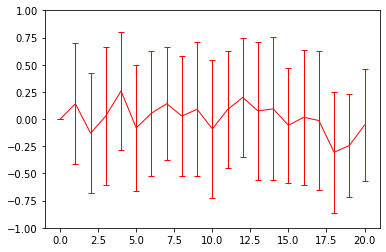

In [285]:
data=np.array(data)
plt.errorbar(range(data.shape[1]),data.mean(axis=0), yerr=data.std(axis=0),color="r",zorder=-2,capsize=3,lw=1,label="error")
plt.ylim(-1,1)